# Chapter 3: Data Visualization

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

Pandas provides a number of basic plotting capabilities. Matplotlib however gives you more control over details of the visualisation. The Pandas plot methods return an axes object, which can also be used to modify the visualisation using basic matplotlib commands.

## Import required packages

In [12]:
%matplotlib inline
import os
import calendar
from pathlib import Path
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt


## Bar and Scatter plots


Load Boston Housing data and display the average median value intersecting Charles River (CHAS)

In [13]:
housing = pd.read_csv('BostonHousing.csv')
print(housing.shape)

(506, 14)


In [14]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [15]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [16]:
housing = housing.rename(columns = {'CAT. MEDV' : 'CAT_MEDV'})

In [17]:
housing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT_MEDV'],
      dtype='object')

In [18]:
ax = housing.groupby('CHAS').mean().MEDV
ax

CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='CHAS'>

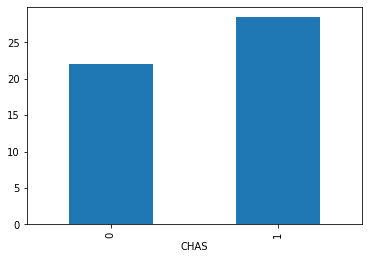

In [19]:
ax.plot(kind='bar')

In [20]:
dataforplot = housing.groupby('CHAS').mean().MEDV

Text(0, 0.5, 'Median Home Value')

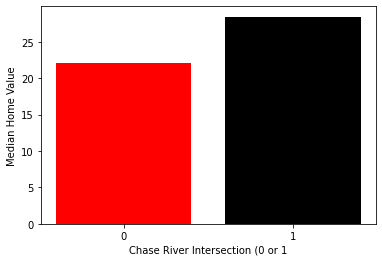

In [21]:
fig, ax = plt.subplots()
ax.bar(dataforplot.index, dataforplot, color=['red','black'])
ax.set_xticks([0,1])
ax.set_xlabel('Chase River Intersection (0 or 1')
ax.set_ylabel('Median Home Value')

In [22]:
# Display reationship between Median value and LStat

SyntaxError: invalid syntax (<ipython-input-22-7bead3c31c28>, line 1)

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

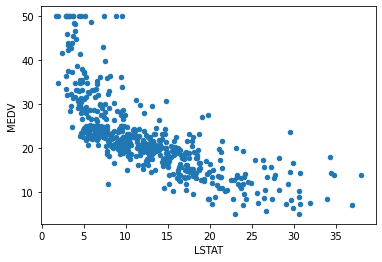

In [23]:
housing.plot.scatter('LSTAT','MEDV')

Text(0, 0.5, 'Median Home Value')

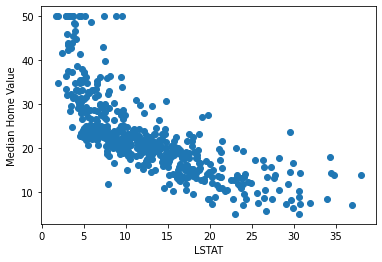

In [24]:
fig, ax = plt.subplots()
ax.scatter(housing.LSTAT, housing.MEDV)
plt.xlabel('LSTAT')
plt.ylabel('Median Home Value')

## Distribution Plots (Boston Housing)
Histogram of MEDV

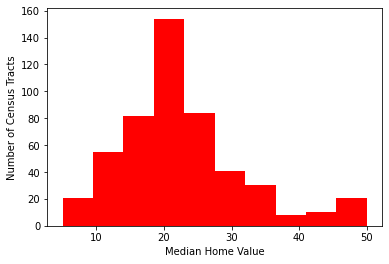

In [25]:
ax = housing.MEDV.hist(color=['red'])
ax.set_xlabel('Median Home Value')
ax.set_ylabel('Number of Census Tracts')
ax.grid(None)

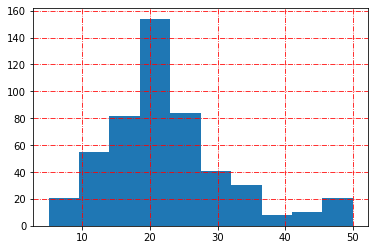

In [26]:
fig, ax = plt.subplots()
ax.hist(housing.MEDV)
ax.grid(linestyle = '-.', color='red')

<AxesSubplot:>

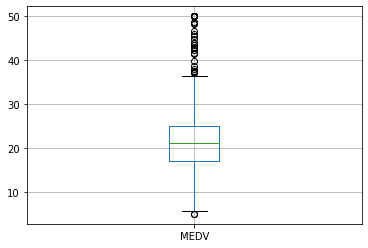

In [27]:
housing.boxplot(column='MEDV')

Text(0.5, 1.0, 'Median Home Values')

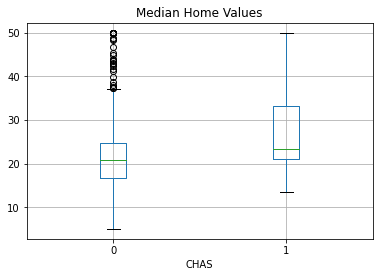

In [28]:
housing.boxplot(column='MEDV', by='CHAS')
plt.suptitle('')
plt.title('Median Home Values')

In [29]:
box_data = [list(housing[housing.CHAS == 0].MEDV),
            list(housing[housing.CHAS == 1].MEDV)]

Text(0, 0.5, 'Median Value')

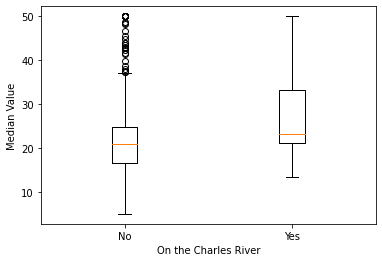

In [30]:
fig, ax = plt.subplots()
ax.boxplot(box_data)
ax.set_xticklabels(['No','Yes'])
ax.set_xlabel('On the Charles River')
ax.set_ylabel('Median Value')

## Line Plot (Amtrak Data)
Load the Amtrak data and convert them to be suitable for time series analysis

In [31]:
amtrak = pd.read_csv('Amtrak.csv')
print(amtrak.head())
amtrak.info()

        Month  Ridership
0  01/01/1991   1708.917
1  01/02/1991   1620.586
2  01/03/1991   1972.715
3  01/04/1991   1811.665
4  01/05/1991   1974.964
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      159 non-null    object 
 1   Ridership  159 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [32]:
amtrak['date'] = pd.to_datetime(amtrak.Month, format='%d/%m/%Y')
print(amtrak.head())
amtrak.info()

        Month  Ridership       date
0  01/01/1991   1708.917 1991-01-01
1  01/02/1991   1620.586 1991-02-01
2  01/03/1991   1972.715 1991-03-01
3  01/04/1991   1811.665 1991-04-01
4  01/05/1991   1974.964 1991-05-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      159 non-null    object        
 1   Ridership  159 non-null    float64       
 2   date       159 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.9+ KB


In [33]:
amtrak_ts=pd.Series(amtrak.Ridership.values, index=amtrak.date)
amtrak_ts.head()

date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
dtype: float64

<AxesSubplot:xlabel='date'>

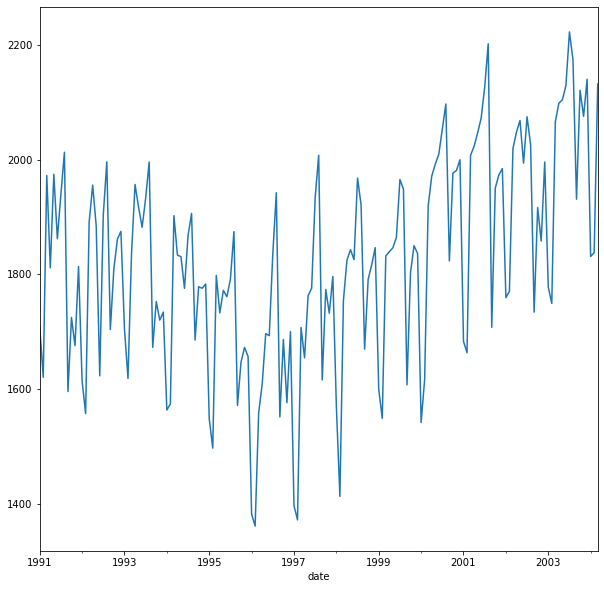

In [34]:
amtrak_ts.plot(figsize=[10,10])

<AxesSubplot:xlabel='date'>

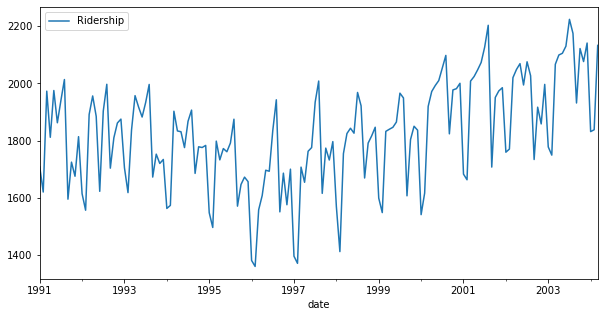

In [35]:
amtrak.plot('date','Ridership',kind='line', figsize=[10,5])

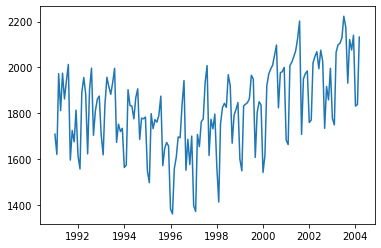

In [36]:
fig, ax = plt.subplots() 
plt.plot(amtrak.date, amtrak.Ridership)

## Heat Maps (Boston housing)

In [37]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [38]:
corr = housing.corr()
corr.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,-0.232502


<AxesSubplot:>

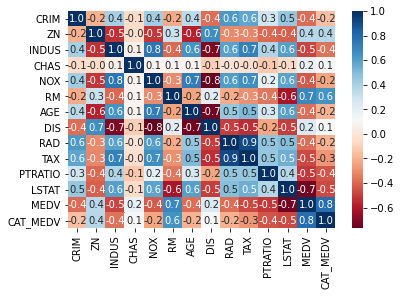

In [39]:
sns.heatmap(corr, annot=True, fmt='.1f', cmap='RdBu')

<AxesSubplot:>

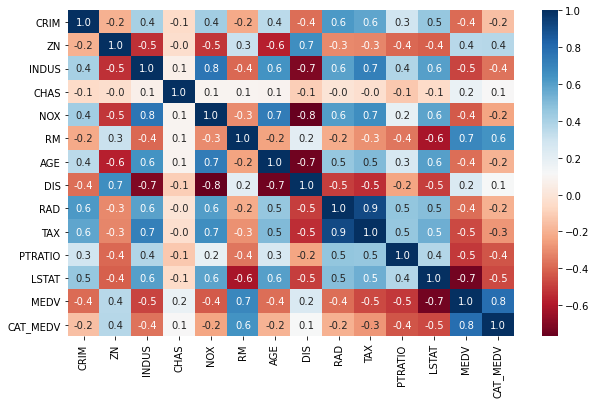

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
sns.heatmap(corr, cmap='RdBu', annot=True, fmt='.1f')

## Adding Dimesions to plots


In [41]:
# Create Scatter plot by NOX and LStat
# Color the points by the value of CAT.MEDV

<AxesSubplot:xlabel='LSTAT', ylabel='NOX'>

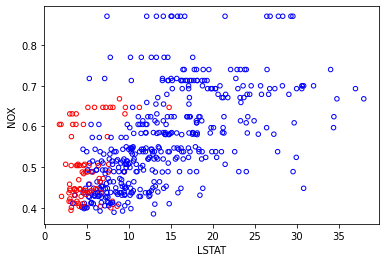

In [42]:
housing.plot.scatter('LSTAT','NOX', 
                     edgecolor=['red' if c==1 else 'blue' for c in housing.CAT_MEDV], color='none')


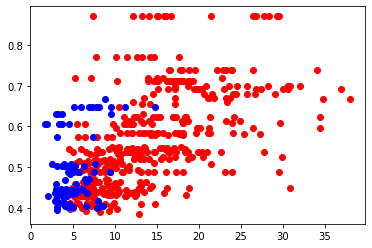

In [43]:
fig, ax=plt.subplots()
for catValue, color in (0,'red'), (1,'blue') :
  subset_df = housing[housing.CAT_MEDV == catValue]
  ax.scatter(subset_df.LSTAT, subset_df.NOX, color=color)

## Scatter Plot Matrix
Scatterplot matrix

In [44]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


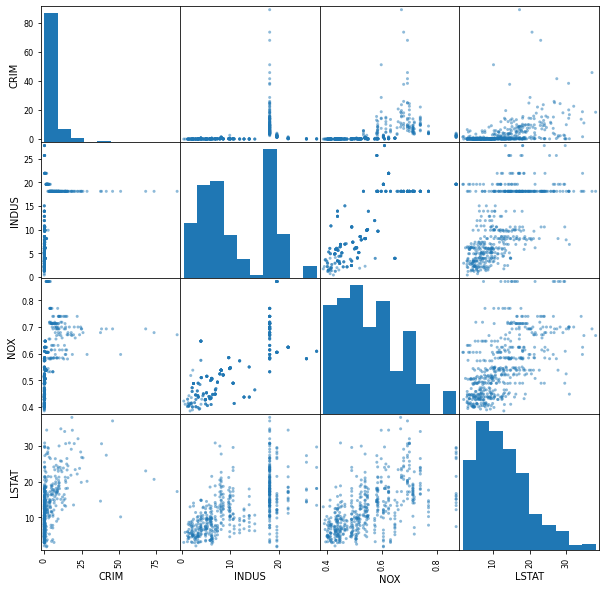

In [45]:
s = scatter_matrix(housing[['CRIM','INDUS','NOX','LSTAT']], figsize=[10,10])

## Log Plotting (uncrowd the data)

Create scatter plot of Med value and CRIM using Boston Housing data

<AxesSubplot:xlabel='CRIM', ylabel='MEDV'>

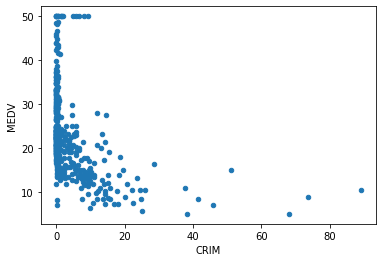

In [46]:
housing.plot.scatter('CRIM','MEDV')

<AxesSubplot:xlabel='CRIM', ylabel='MEDV'>

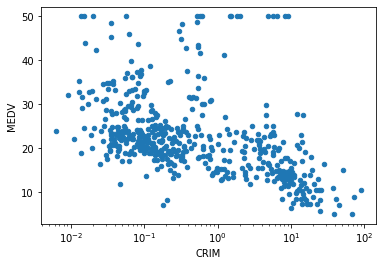

In [47]:
housing.plot.scatter('CRIM','MEDV', logx=True)

## Amtrak Ridership Curve Plots

Text(0, 0.5, 'Ridership (in thousands)')

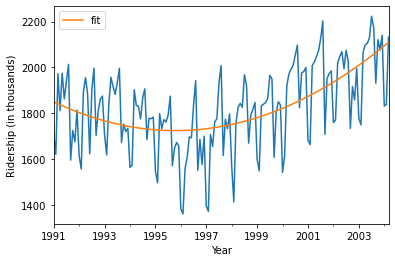

In [48]:
fig, axes = plt.subplots()
#fit a curve
quadraticFit = np.poly1d(np.polyfit(range(len(amtrak)),amtrak.Ridership,2))
Amtrak_fit = pd.DataFrame({'fit':[quadraticFit(t) for t in range(len(amtrak_ts))]})
Amtrak_fit.index = amtrak_ts.index
Amtrak_fit.head()

ax = amtrak_ts.plot()
Amtrak_fit.plot(ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Ridership (in thousands)')

## Scatter plot with label (Utilities)

In [49]:
utilities = pd.read_csv('Utilities.csv')
utilities.head()

,Company,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,Arizona,1.06,9.2,151,54.4,1.6,9077,0.0,0.628
1,Boston,0.89,10.3,202,57.9,2.2,5088,25.3,1.555
2,Central,1.43,15.4,113,53.0,3.4,9212,0.0,1.058
3,Commonwealth,1.02,11.2,168,56.0,0.3,6423,34.3,0.700
4,NY,1.49,8.8,192,51.2,1.0,3300,15.6,2.044


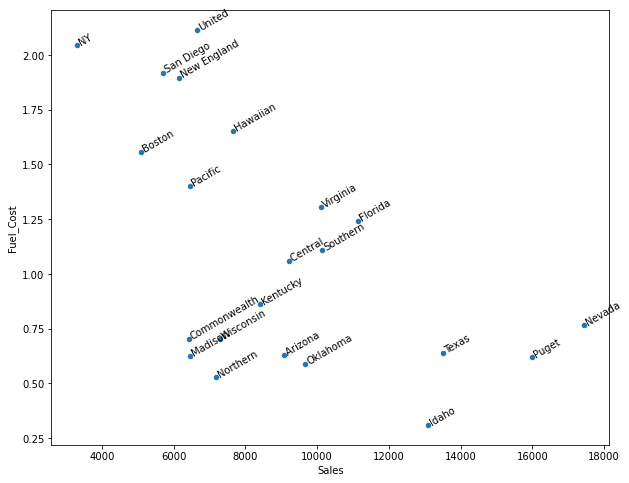

In [50]:

ax=utilities.plot.scatter('Sales','Fuel_Cost', figsize=[10,8])
points = utilities[['Sales','Fuel_Cost','Company']]
p = points.apply(lambda x: ax.text(*x, rotation=30), axis=1)


## Parallel Coordinates (Boston Housing)